In [1]:
import tensorflow as tf
import tensorflow_datasets as tfds    #Importamos librerias, que ya esta
                                # Nos vamos a la capa de abstraccion mas alta con Keras, que ademas tiene datasets colaborativos que podemos utilizar

In [2]:
#Descargar set de datos de Fashion MNIST de Zalando
datos, metadatos = tfds.load('fashion_mnist', as_supervised=True, with_info=True)   #fucnion load de tensorflow_datasets  with_info=True => permite descargar datos y metadatos
                                                                                #  1º parametro ponemos el string del dataset
                                                                                #  y aqui tb con load() se cargan los datos y metados

Dl Completed...: 0 url [00:00, ? url/s]

Dl Size...: 0 MiB [00:00, ? MiB/s]

Extraction completed...: 0 file [00:00, ? file/s]

Generating splits...:   0%|          | 0/2 [00:00<?, ? splits/s]

Generating train examples...:   0%|          | 0/60000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteVTZ5QR/fashion_mnist-train.tfrecord*...:   0…

Generating test examples...:   0%|          | 0/10000 [00:00<?, ? examples/s]

Shuffling /root/tensorflow_datasets/fashion_mnist/3.0.1.incompleteVTZ5QR/fashion_mnist-test.tfrecord*...:   0%…

Dataset fashion_mnist downloaded and prepared to /root/tensorflow_datasets/fashion_mnist/3.0.1. Subsequent calls will reuse this data.


In [ ]:
# Esto lo ejecutamos si tenemos el dataset guardado en el Drive y los queremos cargar desde ahí
#from google.colab import drive
#drive.mount('/content/drive')

In [158]:
#Imprimir los metadatos para ver que trae el set
metadatos

tfds.core.DatasetInfo(
    name='fashion_mnist',
    full_name='fashion_mnist/3.0.1',
    description="""
    Fashion-MNIST is a dataset of Zalando's article images consisting of a training set of 60,000 examples and a test set of 10,000 examples. Each example is a 28x28 grayscale image, associated with a label from 10 classes.
    """,
    homepage='https://github.com/zalandoresearch/fashion-mnist',
    data_dir=PosixGPath('/tmp/tmpndwupaiytfds'),
    file_format=tfrecord,
    download_size=29.45 MiB,
    dataset_size=36.42 MiB,
    features=FeaturesDict({
        'image': Image(shape=(28, 28, 1), dtype=uint8),
        'label': ClassLabel(shape=(), dtype=int64, num_classes=10),
    }),
    supervised_keys=('image', 'label'),
    disable_shuffling=False,
    splits={
        'test': <SplitInfo num_examples=10000, num_shards=1>,
        'train': <SplitInfo num_examples=60000, num_shards=1>,
    },
    citation="""@article{DBLP:journals/corr/abs-1708-07747,
      author    = {Han Xiao an

In [159]:
#Obtenemos en variables separadas los datos de entrenamiento (60k) y pruebas (10k)
datos_entrenamiento, datos_pruebas = datos['train'], datos['test']
# En los datos tneemos los datos de entrenamiento  y los de test.
#  Guardaos los datos desgloadasedo en variables: una para train y otra para test

In [160]:
#Etiquetas de las 10 categorias posibles
nombres_clases = metadatos.features['label'].names
#  Aqi cargo las etiquetas de forma generalista que puedo encontrar en mi modelo

In [161]:
#Muestro las etiquta
nombres_clases

['T-shirt/top',
 'Trouser',
 'Pullover',
 'Dress',
 'Coat',
 'Sandal',
 'Shirt',
 'Sneaker',
 'Bag',
 'Ankle boot']

In [162]:
#Funcion de normalizacion para los datos (Pasar de 0-255 a 0-1)
# ETAPA DE PREPROCESADO => CONVERTIMOS DATOS DE 0-255  A 0-1. Las imagenes vienen en escala de grises, pero el
# modelo las necesita binarizadas.
#  Y aqui normalizamos.

#Hace que la red aprenda mejor y mas rapido
def normalizar(imagenes, etiquetas):
  imagenes = tf.cast(imagenes, tf.float32)
  imagenes /= 255 #Aqui lo pasa de 0-255 a 0-1
  return imagenes, etiquetas

#Normalizar los datos de entrenamiento y pruebas con la funcion que hicimos
datos_entrenamiento = datos_entrenamiento.map(normalizar)
datos_pruebas = datos_pruebas.map(normalizar)

#Agregar a cache (usar memoria en lugar de disco, entrenamiento mas rapido)
datos_entrenamiento = datos_entrenamiento.cache()
datos_pruebas = datos_pruebas.cache()

In [163]:
datos_entrenamiento.take(1)

<_TakeDataset element_spec=(TensorSpec(shape=(28, 28, 1), dtype=tf.float32, name=None), TensorSpec(shape=(), dtype=tf.int64, name=None))>

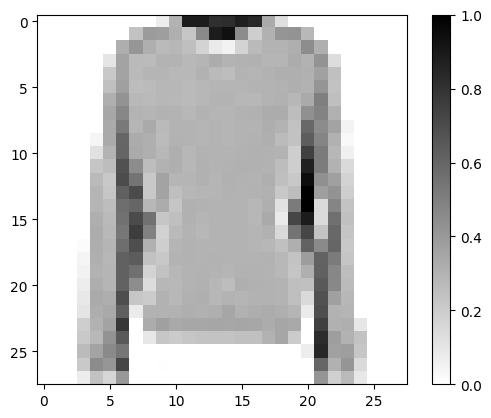

In [164]:
#Mostrar una imagen de los datos de pruebas, de momento mostremos la primera
for imagen, etiqueta in datos_entrenamiento.take(1):
  break
imagen = imagen.numpy().reshape((28,28)) #Redimensionar, cosas de tensores, lo veremos despues

import matplotlib.pyplot as plt

#Dibujar dibujar
plt.figure()
plt.imshow(imagen, cmap=plt.cm.binary)
plt.colorbar()
plt.grid(False)
plt.show()

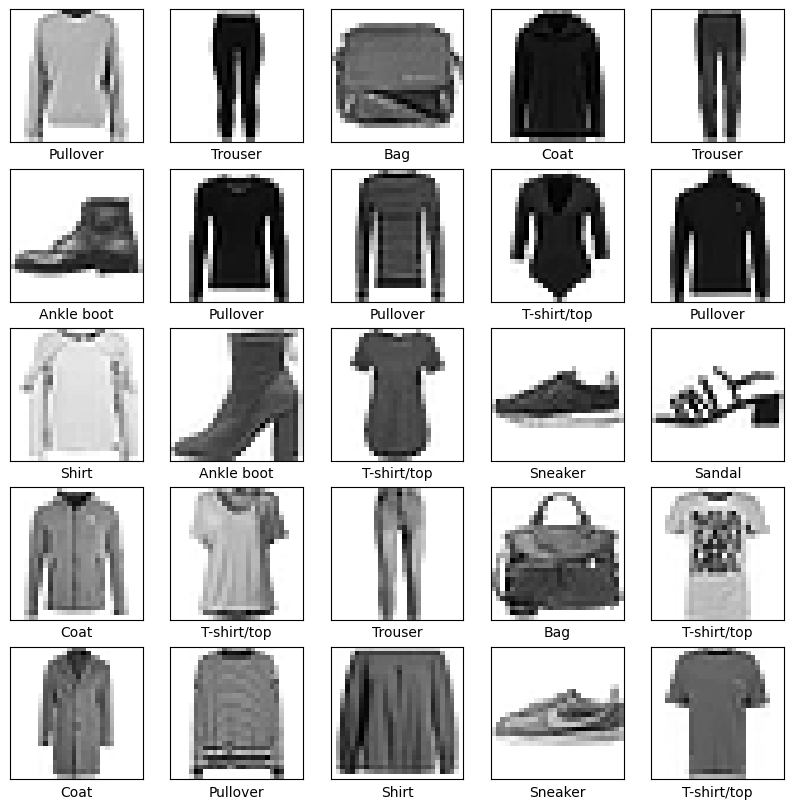

In [165]:
#  Para dibujar mas => simplemente tenemos que iterar
plt.figure(figsize=(10,10)) # si queresmo pintar mas , tenemos que reestructurar el tamaño el array, aqui se muesra 5x5 porque
                          # cada imagen ocupa 2
for i, (imagen, etiqueta) in enumerate(datos_entrenamiento.take(25)):
  imagen = imagen.numpy().reshape((28,28))
  plt.subplot(5,5,i+1)
  plt.xticks([])
  plt.yticks([])
  plt.grid(False)
  plt.imshow(imagen, cmap=plt.cm.binary)
  plt.xlabel(nombres_clases[etiqueta])
plt.show()

A continuación se prueban diferentes configuraciones y parametrizaciones para las redes neuronales.
Se deja descomentada aquella que da mejores resultados.
El resto de configuraciones y parametrizaciones de redes neuronales probadas se dejan comentadas.

In [166]:
#  CREAR MODELO

#Crear el modelo  => AQui creo modelo   - Es modelo de red neuronal de tipo secuencial => siempre avanza hacia adelante
#  Utilizamos un modelo secuencial de keras

modelo = tf.keras.Sequential([
  tf.keras.layers.Flatten(input_shape=(28,28,1)), # el tercer parametro : 1 - blanco y negro   #capa entrada

  #   CONFIGURACION 1
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  #tf.keras.layers.Dense(60, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(60, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(20, activation=tf.nn.relu),   # 5º capa tiene activacion de tipo relu, es capa de 20 neuronas y con activacion relu


  # CONFIGURACION 2 """
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(20, activation=tf.nn.relu),   # 5º capa tiene activacion de tipo relu, es capa de 20 neuronas y con activacion relu

  # CONFIGURACION 3
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(20, activation=tf.nn.relu),   # 5º capa tiene activacion de tipo relu, es capa de 20 neuronas y con activacion relu

  # CONFIGURACION 4 !!
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(60, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(30, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(20, activation=tf.nn.relu),   # 5º capa tiene activacion de tipo relu, es capa de 20 neuronas y con activacion relu

  # CONFIGURACION 5
  #tf.keras.layers.Dense(60, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  #tf.keras.layers.Dense(30, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(20, activation=tf.nn.relu),   # 5º capa tiene activacion de tipo relu, es capa de 20 neuronas y con activacion relu

   # CONFIGURACION 6 y 7 idem a 6 pero con mas epochs
  tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  tf.keras.layers.Dense(160, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  # 5º capa tiene activacion de tipo relu, es capa de 20 neuronas y con activacion relu

  # CONFIGURCION 8  ==> PEORES RESULTAOS
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 2º capa tiene activacion de tipo relu, es capa de 80 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(160, activation=tf.nn.relu),   # 4º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(80, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(40, activation=tf.nn.relu),   # 3º capa tiene activacion de tipo relu, es capa de 60 neuronas y con activacion relu
  #tf.keras.layers.Dense(60, activation=tf.nn.relu),
  #tf.keras.layers.Dense(30, activation=tf.nn.relu),



  tf.keras.layers.Dense(10, activation=tf.nn.softmax) #Para redes de clasificacion    => 4º capa , con activacion softmax. Y con 10 neuroans, ¿por que
  # 10 neuraons? porque tengo 10 tipos de prendas. Cuando se ejecute el modelo estas 10 neuronas tendran un valor, y aquella que tenga el
  # valor mas alto es la que nos dira que tipo de prenda es.
])

In [167]:
#Compilar el modelo
#   Aqui utilizamos la pertida y la metricu ade accuracy

modelo.compile(
    optimizer='adam',
    loss=tf.keras.losses.SparseCategoricalCrossentropy(),
    metrics=['accuracy']
)

In [168]:
#Los numeros de datos en entrenamiento y pruebas (60k y 10k)
num_ej_entrenamiento = metadatos.splits["train"].num_examples
num_ej_pruebas = metadatos.splits["test"].num_examples

In [169]:
print(num_ej_entrenamiento)
print(num_ej_pruebas)

60000
10000


In [170]:
#El trabajo por lotes permite que entrenamientos con gran cantidad de datos se haga de manera mas eficiente
TAMANO_LOTE = 50      

#Shuffle y repeat hacen que los datos esten mezclados de manera aleatoria para que la red
#no se vaya a aprender el orden de las cosas
datos_entrenamiento = datos_entrenamiento.repeat().shuffle(num_ej_entrenamiento).batch(TAMANO_LOTE)     # shuffle es mezclar, desordenar, para que los
                                                                          #datos esten desordeandos y la red aprenda mejor, de modo que las prendas
                                                                          # los tipos de prendas esten desordenadas, y no todas las prendas de un
                                                                          # tipo igaul
datos_pruebas = datos_pruebas.batch(TAMANO_LOTE)

In [171]:
import math

#Entrenar
historial = modelo.fit(datos_entrenamiento, epochs=80, steps_per_epoch= math.ceil(num_ej_entrenamiento/TAMANO_LOTE))

Epoch 1/80
1200/1200 [==============================] - 5s 2ms/step - loss: 0.5462 - accuracy: 0.8031
Epoch 2/80
1200/1200 [==============================] - 3s 3ms/step - loss: 0.3827 - accuracy: 0.8587
Epoch 3/80
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3506 - accuracy: 0.8719
Epoch 4/80
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3298 - accuracy: 0.8797
Epoch 5/80
1200/1200 [==============================] - 3s 2ms/step - loss: 0.3127 - accuracy: 0.8830
Epoch 6/80
1200/1200 [==============================] - 3s 3ms/step - loss: 0.2955 - accuracy: 0.8901
Epoch 7/80
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2855 - accuracy: 0.8919
Epoch 8/80
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2793 - accuracy: 0.8954
Epoch 9/80
1200/1200 [==============================] - 3s 2ms/step - loss: 0.2685 - accuracy: 0.8995
Epoch 10/80
1200/1200 [==============================] - 3s 3ms/step - loss: 0.256

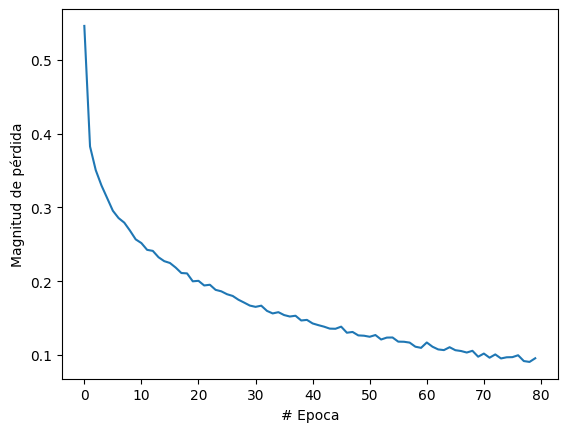

In [172]:
#Ver la funcion de perdida
plt.xlabel("# Epoca")
plt.ylabel("Magnitud de pérdida")
plt.plot(historial.history["loss"])

2/2 [==============================] - 0s 6ms/step


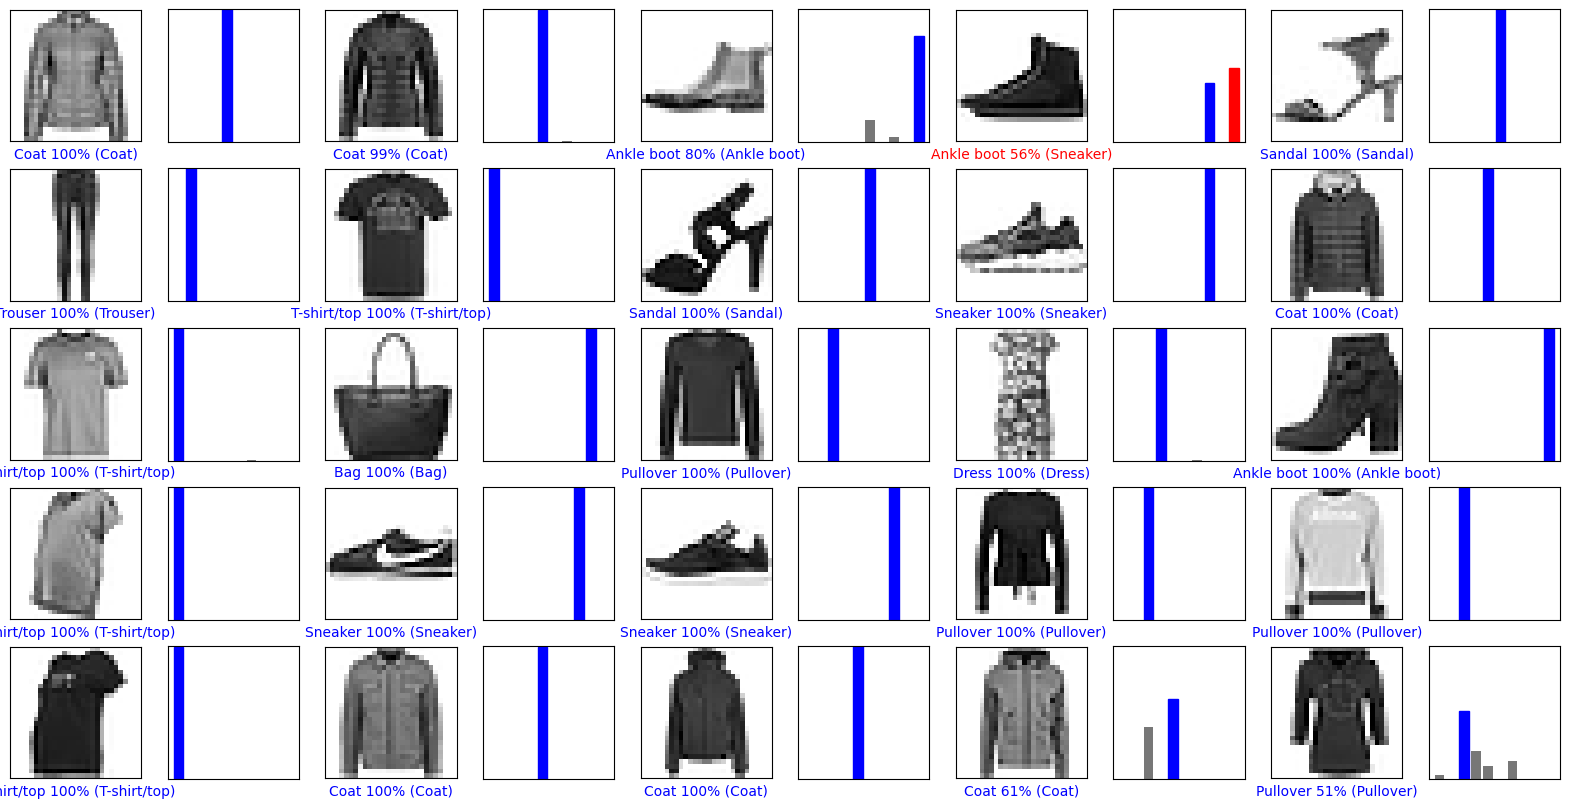

In [173]:
#Pintar una cuadricula con varias predicciones, y marcar si fue correcta (azul) o incorrecta (roja)
import numpy as np

for imagenes_prueba, etiquetas_prueba in datos_pruebas.take(1):
  imagenes_prueba = imagenes_prueba.numpy()
  etiquetas_prueba = etiquetas_prueba.numpy()
  predicciones = modelo.predict(imagenes_prueba)    #Lo interesantess como pinta las graficas, va guardando las predicciones
                                                  # y luego las compara con

def graficar_imagen(i, arr_predicciones, etiquetas_reales, imagenes):
  arr_predicciones, etiqueta_real, img = arr_predicciones[i], etiquetas_reales[i], imagenes[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img[...,0], cmap=plt.cm.binary)

  etiqueta_prediccion = np.argmax(arr_predicciones)
  if etiqueta_prediccion == etiqueta_real:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(nombres_clases[etiqueta_prediccion],
                                100*np.max(arr_predicciones),
                                nombres_clases[etiqueta_real]),
                                color=color)

def graficar_valor_arreglo(i, arr_predicciones, etiqueta_real):
  arr_predicciones, etiqueta_real = arr_predicciones[i], etiqueta_real[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])
  grafica = plt.bar(range(10), arr_predicciones, color="#777777")
  plt.ylim([0, 1])
  etiqueta_prediccion = np.argmax(arr_predicciones)

  grafica[etiqueta_prediccion].set_color('red')
  grafica[etiqueta_real].set_color('blue')

filas = 5
columnas = 5
num_imagenes = filas*columnas
plt.figure(figsize=(2*2*columnas, 2*filas))
for i in range(num_imagenes):
  plt.subplot(filas, 2*columnas, 2*i+1)
  graficar_imagen(i, predicciones, etiquetas_prueba, imagenes_prueba)
  plt.subplot(filas, 2*columnas, 2*i+2)
  graficar_valor_arreglo(i, predicciones, etiquetas_prueba)




In [174]:
#Probar una imagen suelta
imagen = imagenes_prueba[4] #AL ser la variable imagenes_prueba solo tiene lo que se le puso en el bloque anterior heheh
imagen = np.array([imagen])
prediccion = modelo.predict(imagen) # con modelo.predict() podemos probar 1 prediccion en concreto uno

print("Prediccion: " + nombres_clases[np.argmax(prediccion[0])])

1/1 [==============================] - 0s 18ms/step
Prediccion: Sandal


In [175]:
#Exportacion del modelo a h5
modelo.save('modelo_exportado.h5')

In [176]:
#Instalar tensorflowjs para convertir el h5 a un modelo que pueda cargar tensorflowjs en un explorador
!pip install tensorflowjs

In [177]:
#Convertir el archivo h5 a formato de tensorflowjs
!mkdir tfjs_target_dir
!tensorflowjs_converter --input_format keras modelo_exportado.h5 tfjs_target_dir

mkdir: cannot create directory ‘tfjs_target_dir’: File exists
2024-03-13 13:28:37.564460: E external/local_xla/xla/stream_executor/cuda/cuda_dnn.cc:9261] Unable to register cuDNN factory: Attempting to register factory for plugin cuDNN when one has already been registered
2024-03-13 13:28:37.564517: E external/local_xla/xla/stream_executor/cuda/cuda_fft.cc:607] Unable to register cuFFT factory: Attempting to register factory for plugin cuFFT when one has already been registered
2024-03-13 13:28:37.565476: E external/local_xla/xla/stream_executor/cuda/cuda_blas.cc:1515] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2024-03-13 13:28:38.686223: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [178]:
#Veamos si si creo la carpeta
!ls

modelo_exportado.h5  sample_data  tfjs_target_dir


In [179]:
#Veamos el contenido de la carpeta
!ls tfjs_target_dir

group1-shard1of1.bin  model.json
